In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import trapz

In [2]:
df = pd.read_csv('model_outcome.csv')
df.head()

,index,class,predicted_prob
0,1,0,0.592837
1,2,1,0.624829
2,3,0,0.073848
3,4,1,0.544891
4,5,0,0.015118


In [3]:
def perf_metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
    
    #We find the True positive rate and False positive rate based on the threshold
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

In [4]:
fpr,tpr =perf_metrics(df['class'],df['predicted_prob'],0.5)

In [5]:
#Sensitivity is When it's actually yes, how often does it predict yes? Same as TPR
#Specificity is  When it's actually no, how often does it predict no? Same as (1-FPR)
print('Sensitivity: {} ,'.format(round(tpr,2)),'Specificity: {}'.format(round(1-fpr,2)))

Sensitivity: 0.82 , Specificity: 0.76


In [6]:
#Now we calculate FPR and TPR for different thresholds and get AUC and ROC
thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

roc_points = []
for threshold in thresholds:
    rates = perf_metrics(df['class'], df['predicted_prob'], threshold)
    roc_points.append(rates)

In [7]:
fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

In [8]:
#We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

Area under curve=0.888551469176109


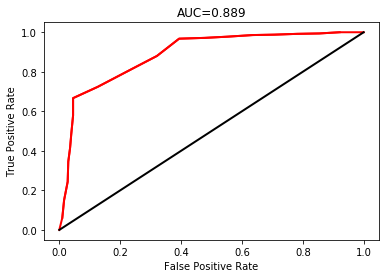

In [9]:
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()

In [10]:
#Area Under the Curve is the percentage of this box that is under this curve.
#This classifier has an AUC of around 0.88 which indicates it is a decent classifier. 